# MOAI 2025 Training 

本題目是 MOAI 2025 的訓練題目

你將使用 PyTorch 來構建一個卷積神經網絡（CNN）模型，用於識別手寫數字，請按照以下步驟完成任務。

第一段代碼中的 TaskGrader 是一個評分器，請不要修改。可以點擊代碼塊中左側的深色部分將代碼摺疊。
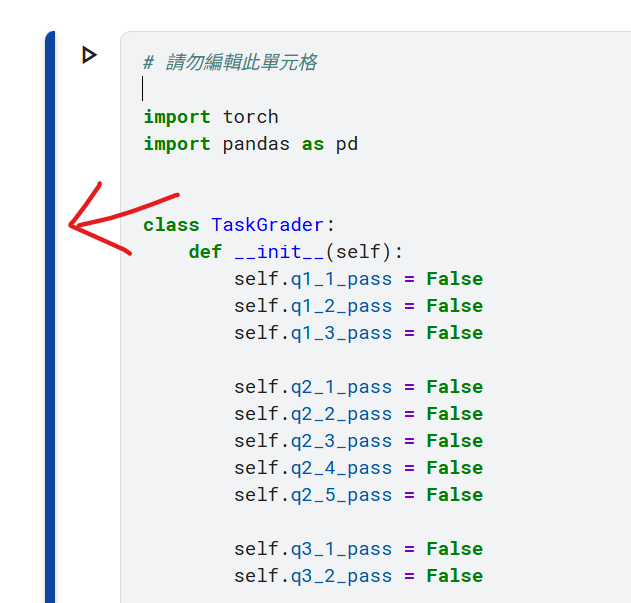

In [ ]:
# 此部分為評分器，請勿編輯此單元格

import torch
import pandas as pd


class TaskGrader:
    def __init__(self):
        self.q1_1_pass = False
        self.q1_2_pass = False
        self.q1_3_pass = False

        self.q2_1_pass = False
        self.q2_2_pass = False
        self.q2_3_pass = False
        self.q2_4_pass = False
        self.q2_5_pass = False

        self.q3_1_pass = False
        self.q3_2_pass = False

    def q1_1_check(self, images_raw, labels_raw):
        try:
            assert isinstance(images_raw, torch.Tensor), "圖片應該是 torch.Tensor 類型"
            assert images_raw.shape == (60000, 28, 28), f"圖片維度大小應該是 (60000, 28, 28)，現在是{images_raw.shape}"

            assert isinstance(labels_raw, pd.DataFrame), "標籤應該是 pandas DataFrame 類型"
            assert len(labels_raw) == 60000, f"標籤應該有 60000 行，現在是 {len(labels_raw)}"
        except AssertionError as e:
            print("Q1.1未通過:", str(e))
            return

        self.q1_1_pass = True
        print("Q1.1通過 (5分)")

    def q1_2_check(self, images, labels):
        try:
            assert isinstance(images, torch.Tensor), "歸一化後的圖像必須是 torch.Tensor 類型"
            assert isinstance(labels, torch.Tensor), "標籤必須是 torch.Tensor 類型"

            assert -0.1 < images.mean() < 0.1, f"歸一化圖像的均值應接近0，現在是{images.mean()}"
            assert 0.9 < images.std() < 1.1, f"歸一化圖像的標準差應接近1，現在是{images.std()}"
        except AssertionError as e:
            print("Q1.2未通過:", str(e))
            return

        self.q1_2_pass = True
        print("Q1.2通過 (5分)")

    def q1_3_check(self, train_dataset, val_dataset):
        try:
            total_size = len(train_dataset) + len(val_dataset)
            train_ratio = len(train_dataset) / total_size

            assert 0.79 <= train_ratio <= 0.81, f"訓練-驗證集分割應為8:2，現在是{train_ratio:.2f}:{1 - train_ratio:.2f}"
        except AssertionError as e:
            print("Q1.3未通過:", str(e))
            return

        self.q1_3_pass = True
        print("Q1.3通過 (5分)")

    def q2_check(self, model):
        try:
            for name, module in model.named_modules():
                if isinstance(module, torch.nn.Conv2d):
                    self.q2_1_pass = True
                elif isinstance(module, torch.nn.MaxPool2d):
                    self.q2_2_pass = True
                elif any(
                    isinstance(module, act)
                    for act in [
                        torch.nn.ReLU,
                        torch.nn.Sigmoid,
                        torch.nn.Tanh,
                        torch.nn.ELU,
                        torch.nn.LeakyReLU,
                        torch.nn.PReLU,
                    ]
                ):
                    self.q2_3_pass = True
                elif isinstance(module, torch.nn.Linear):
                    if module.out_features == 10:
                        self.q2_4_pass = True
                        
            
            x = torch.randn(1, 28, 28).to(next(model.parameters()).device)
            output = model(x)
            if output.shape[1] == 10:
                self.q2_5_pass = True
                
        except Exception:
            pass

        checks = [
            (self.q2_1_pass, "Q2.1", "模型應包含卷積層", 2),
            (self.q2_2_pass, "Q2.2", "模型應包含池化層", 2),
            (self.q2_3_pass, "Q2.3", "模型應包含激活函數", 2),
            (self.q2_4_pass, "Q2.4", "模型應包含輸出層", 2),
            (self.q2_5_pass, "Q2.5", "未能成功定義前向傳播，輸出分類結果", 7)
        ]
        
        for check in checks:
            if not check[0]:
                print(f"{check[1]}未通過: {check[2]}")
            else:
                print(f"{check[1]}通過 ({check[3]}分)")


    def q3_1_check(self, criterion, optimizer):
        try:
            valid_loss_fns = [
                torch.nn.CrossEntropyLoss,
                torch.nn.NLLLoss,
                torch.nn.MSELoss,
                torch.nn.L1Loss,
                torch.nn.SmoothL1Loss,
                torch.nn.HuberLoss,
                torch.nn.SoftMarginLoss,
                torch.nn.MultiLabelMarginLoss,
                torch.nn.MultiLabelSoftMarginLoss,
            ]

            valid_optimizers = [
                torch.optim.SGD,
                torch.optim.Adam,
                torch.optim.RMSprop,
                torch.optim.Adagrad,
                torch.optim.Adadelta,
                torch.optim.Adamax,
                torch.optim.AdamW,
                torch.optim.SparseAdam,
                torch.optim.ASGD,
                torch.optim.Rprop,
                torch.optim.LBFGS,
                torch.optim.NAdam,
            ]

            is_valid_loss = any(isinstance(criterion, loss_fn) for loss_fn in valid_loss_fns)
            is_valid_optimizer = any(isinstance(optimizer, opt) for opt in valid_optimizers)

            assert is_valid_loss, "必須使用有效的損失函數 (CrossEntropyLoss, NLLLoss, MSELoss 等)"
            assert is_valid_optimizer, "必須使用有效的優化器 (SGD, Adam, RMSprop 等)"

        except Exception as e:
            print("Q3.1未通過:", str(e))
            return

        self.q3_1_pass = True
        print("Q3.1通過 (5分)")

    def q3_2_check(self, train_losses, val_losses, train_accs, val_accs):
        try:
            assert len(train_losses) >= 5, f"應至少訓練5個週期，目前{len(train_losses)}"
            assert len(val_losses) >= 5, f"應至少驗證5個週期，目前{len(val_losses)}"
            assert len(train_accs) >= 5, f"應至少記錄5個週期的訓練準確率，目前{len(train_accs)}"
            assert len(val_accs) >= 5, f"應至少記錄5個週期的驗證準確率，目前{len(val_accs)}"

            assert train_losses[0] > train_losses[-1], "訓練損失應隨着週期減少"

            assert train_accs[-1] > 0.5, f"最終訓練準確率應更高，目前{train_accs[-1]:.2f}"
            assert val_accs[-1] > 0.5, f"最終驗證準確率應更高，目前{val_accs[-1]:.2f}"

        except Exception as e:
            print("Q3.2未通過:", str(e))
            return

        self.q3_2_pass = True
        print("Q3.2通過 (15分)")


task_grader = TaskGrader()

# 此部分為評分器，請勿編輯此單元格

### 小題 1：數據讀取與預處理 (15 分)

數據集包括以下內容

- 訓練圖像數據：train_images.pt (shape: [60000, 28, 28])
- 訓練標籤數據：train_labels.csv
- 測試圖像數據：test_images.pt (shape: [10000, 28, 28])

其中，訓練數據集提供圖像和標籤，測試數據集只提供圖像，不提供標籤

**本題目要求完成以下內容**

1. 讀取數據集圖片和標籤 (5分)
2. 將數據集按 **8:2** 的比例劃分為訓練集和驗證集。 (5分)
3. 將圖像數據歸一化並轉換為 Tensor。 (5分)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, random_split
import pandas as pd

# 讀取數據集，'train-images.pt' 和 'train-labels.csv'
images_raw = torch.load('/kaggle/input/moai-2025-training/train_images.pt', weights_only=False)
labels_raw = pd.read_csv('/kaggle/input/moai-2025-training/train_labels.csv')

# 歸一化數據集並轉換為 torch.Tensor
images = (images_raw.float() - images_raw.float().mean()) / images_raw.float().std()
labels = torch.tensor(labels_raw['label'].values)

# 創建數據集
dataset = TensorDataset(images, labels)

# 按照 8:2 劃分成訓練集和驗證集
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128)

In [ ]:
# 以下代碼執行後可以判斷你的作答是否正確，請勿修改

task_grader.q1_1_check(images_raw, labels_raw)
task_grader.q1_2_check(images, labels)
task_grader.q1_3_check(train_dataset, val_dataset)

### 可視化

以下是一段將數據集進行可視化的代碼，如果前面的代碼編寫正確，會顯示兩行的圖片，第一行是訓練集，第二行是驗證集

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_samples(loader, title):
    images, labels = next(iter(loader))
    images = images[:5]
    labels = labels[:5]
    
    plt.figure(figsize=(15, 3))
    plt.suptitle(title, fontsize=16)
    
    for i in range(5):
        plt.subplot(1, 5, i+1)
        img = images[i].squeeze()
        plt.imshow(img.numpy(), cmap='gray' if img.dim() == 2 else None)
        plt.title(f"Label: {labels[i].item()}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# 可視化訓練集樣本
visualize_samples(train_loader, "Training set")

# 可視化驗證集樣本
visualize_samples(val_loader, "Validation set")

### 小題 2：構建 CNN 模型 (15 分)

定義一個簡單的 CNN 模型，滿足以下條件：

1. 至少包含兩個卷積層 (`nn.Conv2d`) (2分)
2. 至少包含兩個池化層 (`nn.MaxPool2d`) (2分)
3. 使用激活函數 (`nn.ReLU`, `nn.Sigmoid`, `nn.Tanh`, `nn.ELU`, `nn.LeakyReLU`, `nn.PreLU` 等) (2分)
4. 定義輸出層，輸出一個 10 維向量 (對應 10 個類別) (2分)
5. 定義前向傳播，將以上所有網絡層連接（7分）


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
from torch.optim.lr_scheduler import CosineAnnealingLR, ReduceLROnPlateau
from torch.cuda.amp import autocast, GradScaler
import time
import logging
import torchvision.transforms as transforms  # 数据增强
import torch.nn.functional as F  # 激活函数

# 配置日志
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 1. 优化后的 CNN 模型
class OptimizedCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(OptimizedCNN, self).__init__()

        # 第一层卷积块
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),  # 增加通道数
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),  # 增加卷积层
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # 第二层卷积块
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),  # 增加通道数
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),  # 增加卷积层
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # 第三层卷积块
        self.conv_block3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),  # 增加通道数
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),  # 增加卷积层
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # 全连接层
        self.fc_layers = nn.Sequential(
            nn.Linear(256 * 3 * 3, 1024),  # 增加神经元数量
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, 512),  # 增加神经元数量
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.conv_block3(x)
        x = torch.flatten(x, 1)
        x = self.fc_layers(x)
        return x

# 2. 训练函数
def train_model(model, train_loader, val_loader, num_epochs=5, device='cuda'):
    """使用优化后的 CNN 模型和训练策略"""

    # 损失函数
    criterion = nn.CrossEntropyLoss().to(device)

    # 优化器 (AdamW)
    optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)

    # 学习率调度器 (ReduceLROnPlateau)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True) # 监控验证集损失

    # 混合精度训练
    scaler = GradScaler()

    # 记录训练指标
    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []

    logging.info("开始训练优化模型...")
    start_time = time.time()

    for epoch in range(num_epochs):
        epoch_start = time.time()

        # 训练阶段
        model.train()
        train_loss = 0.0
        train_corrects = 0
        train_total = 0

        for batch_idx, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()

            with autocast():
                outputs = model(images)
                loss = criterion(outputs, labels)

            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            train_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            train_corrects += (predicted == labels).sum().item()

            if batch_idx % 100 == 0:
                logging.info(f"Epoch {epoch+1}, Batch {batch_idx}, Train Loss: {loss.item():.4f}")

        train_loss = train_loss / len(train_loader.dataset)
        train_acc = train_corrects / len(train_loader.dataset)
        train_losses.append(train_loss)
        train_accs.append(train_acc)

        # 验证阶段
        model.eval()
        val_loss = 0.0
        val_corrects = 0
        val_total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)

                with autocast():
                    outputs = model(images)
                    loss = criterion(outputs, labels)

                val_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_corrects += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader.dataset)
        val_acc = val_corrects / len(val_loader.dataset)
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        # 学习率调度 (基于验证集损失)
        scheduler.step(val_loss)

        epoch_end = time.time()
        epoch_duration = epoch_end - epoch_start

        logging.info(f"Epoch {epoch+1}/{num_epochs}, "
                     f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
                     f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, "
                     f"Time: {epoch_duration:.2f}s")

    total_time = time.time() - start_time
    logging.info(f"训练完成，总耗时: {total_time:.2f}s")

    return model, train_losses, train_accs, val_losses, val_accs

# 创建模型实例
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = OptimizedCNN().to(device)

# 打印模型结构
print(model)

# 数据增强 (示例，根据你的数据集进行调整)
train_transforms = transforms.Compose([
    transforms.RandomRotation(degrees=10),  # 随机旋转
    transforms.RandomHorizontalFlip(),  # 随机水平翻转
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST 数据集的均值和标准差
])

val_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# 假设你已经有了 train_dataset 和 val_dataset
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
# val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=False)

# 3. 训练模型
model, train_losses, train_accs, val_losses, val_accs = train_model(model, train_loader, val_loader, num_epochs=10, device=device)

In [ ]:
# 以下代碼執行後可以判斷你的作答是否正確，請勿修改

task_grader.q2_check(model)

### 小題 3：訓練模型 (20 分)

1. 選擇損失函數 (`MSELoss`, `CrossEntropyLoss` 等) (2分)
2. 選擇優化器（`SGD`, `Adam` 等），並設置學習率。 (3分)
3. 模型訓練**至少** 5 個 epoch，並在每個 epoch 結束時分別打印訓練集和驗證集的損失函數和準確率。 (15分)


In [ ]:
# 以下代碼執行後可以判斷你的作答是否正確，請勿修改

task_grader.q3_1_check(criterion, optimizer)
task_grader.q3_2_check(train_losses, val_losses, train_accs, val_accs)

### 可視化

以下是一段將數據集進行可視化的代碼，如果前面的代碼編寫正確，會顯示一行圖片，並顯示模型識別出該圖片是哪一個數字

In [ ]:
def visualize_predictions(loader, model, title):
    images, true_labels = next(iter(loader))
    images = images.to(device)
    
    model.eval()
    with torch.no_grad():
        outputs = model(images)
        pred_probs = torch.softmax(outputs, dim=1)
        pred_labels = outputs.argmax(dim=1)
    
    images = images[:5].cpu()
    true_labels = true_labels[:5]
    pred_labels = pred_labels[:5].cpu()
    pred_probs = pred_probs[:5].cpu()
    
    plt.figure(figsize=(15, 3))
    plt.suptitle(title, fontsize=16)
    
    for i in range(5):
        plt.subplot(1, 5, i+1)
        img = images[i].squeeze()
        
        plt.imshow(img.numpy(), cmap='gray' if img.dim() == 2 else None)
        pred_prob = pred_probs[i][pred_labels[i]].item()
        plt.title(f"Prediction: {pred_labels[i].item()}, Answer: {true_labels[i].item()}", 
                 color='green' if pred_labels[i].item() == true_labels[i].item() else 'red')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

visualize_predictions(val_loader, model, "Predictions")

### 提交

以下代碼會生成一個 `submission.csv`，選手只需要在右側菜單中選擇 `Submit to competition > Submit` 就可以完成提交

In [15]:
import torch
import pandas as pd

test_images = torch.load('/kaggle/input/moai-2025-training/test_images.pt', weights_only=True)
test_images = (test_images.float() - test_images.float().mean()) /test_images.float().std()

model.eval() 
with torch.no_grad():
    device = next(model.parameters()).device
    outputs = model(test_images.to(device))
    predictions = outputs.argmax(dim=1)

df_test = pd.DataFrame({"label": predictions.cpu().numpy()})
df_test.to_csv("submission2.csv", index_label="id")

In [ ]:
df_test